In [1]:
!pip install odfpy

import pandas as pd
import matplotlib.pyplot as plt

     -------------------------------------- 717.0/717.0 KB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for odfpy: filename=odfpy-1.4.1-py2.py3-none-any.whl size=137518 sha256=3a755c5ad7209618356f926cb7b1e339cc12d83b81866cfada9e661bd11f64c0
  Stored in directory: c:\users\hajdy\appdata\local\pip\cache\wheels\20\ff\69\1b3f423ffe400b87afa368c70b43d2b5cd3bfb9ac8a613ba5b
Successfully built odfpy


In [2]:
def xls_to_df(path: str) -> pd.DataFrame:
    df = pd.read_excel(path)
    df2 = df.filter([
        'sample',
        'mean20',
        'SEM20',
        'mean50',
        'SEM50',
        'mean100',
        'SEM100'
    ])
    df2 = df2[df2['mean20'].notna()]
    names = []
    days = [1, 4, 7, 11, 7, 11, 1, 4, 7, 11, 7, 11, 1, 4, 7, 11, 7, 11]
    for idx, row in enumerate(df2['sample']):
        name = row[:-5]
        names.append(name.strip(' '))
    df2 = df2.drop(labels='sample', axis=1)
    df2.insert(loc=0, column='name', value=names)
    df2.insert(loc=1, column='day', value=days)
    df10x = df2[df2['name'].isin(['K', 'WW2', 'WW3'])]
    return df10x

In [3]:
def formatted_errorbar(df: pd.DataFrame, ax, title: str, dilution: int):

    k = df[df['name'] == 'K']
    ww2 = df[df['name'] == 'WW2']
    ww3 = df[df['name'] == 'WW3']

    ax.errorbar(
        x=k['day'],
        y=k[f'mean{dilution}'],
        yerr=k[f'SEM{dilution}'],
        fmt='o--',
        color='g',
        label='BG-11'
    )
    ax.errorbar(
        x=ww2['day'],
        y=ww2[f'mean{dilution}'],
        yerr=ww2[f'SEM{dilution}'],
        fmt='o--',
        color='orange',
        label='WW2'
    )
    ax.errorbar(
        x=ww3['day'],
        y=ww3[f'mean{dilution}'],
        yerr=ww3[f'SEM{dilution}'],
        fmt='o--',
        color='r',
        label='WW3'
    )

    ax.legend()
    ax.grid()
    ax.set_xlim([0, 13])
    ax.set_ylim([-10, 150])
    ax.set_yticks([0, 50, 100, 150])
    ax.set_ylabel('Aktywność MlrA', fontdict={'fontsize': 18})
    ax.set_title(title, loc='left', pad=10)

In [4]:
df = xls_to_df('data/AKtywność MlrA_McC7_MlrA20220408.ods')

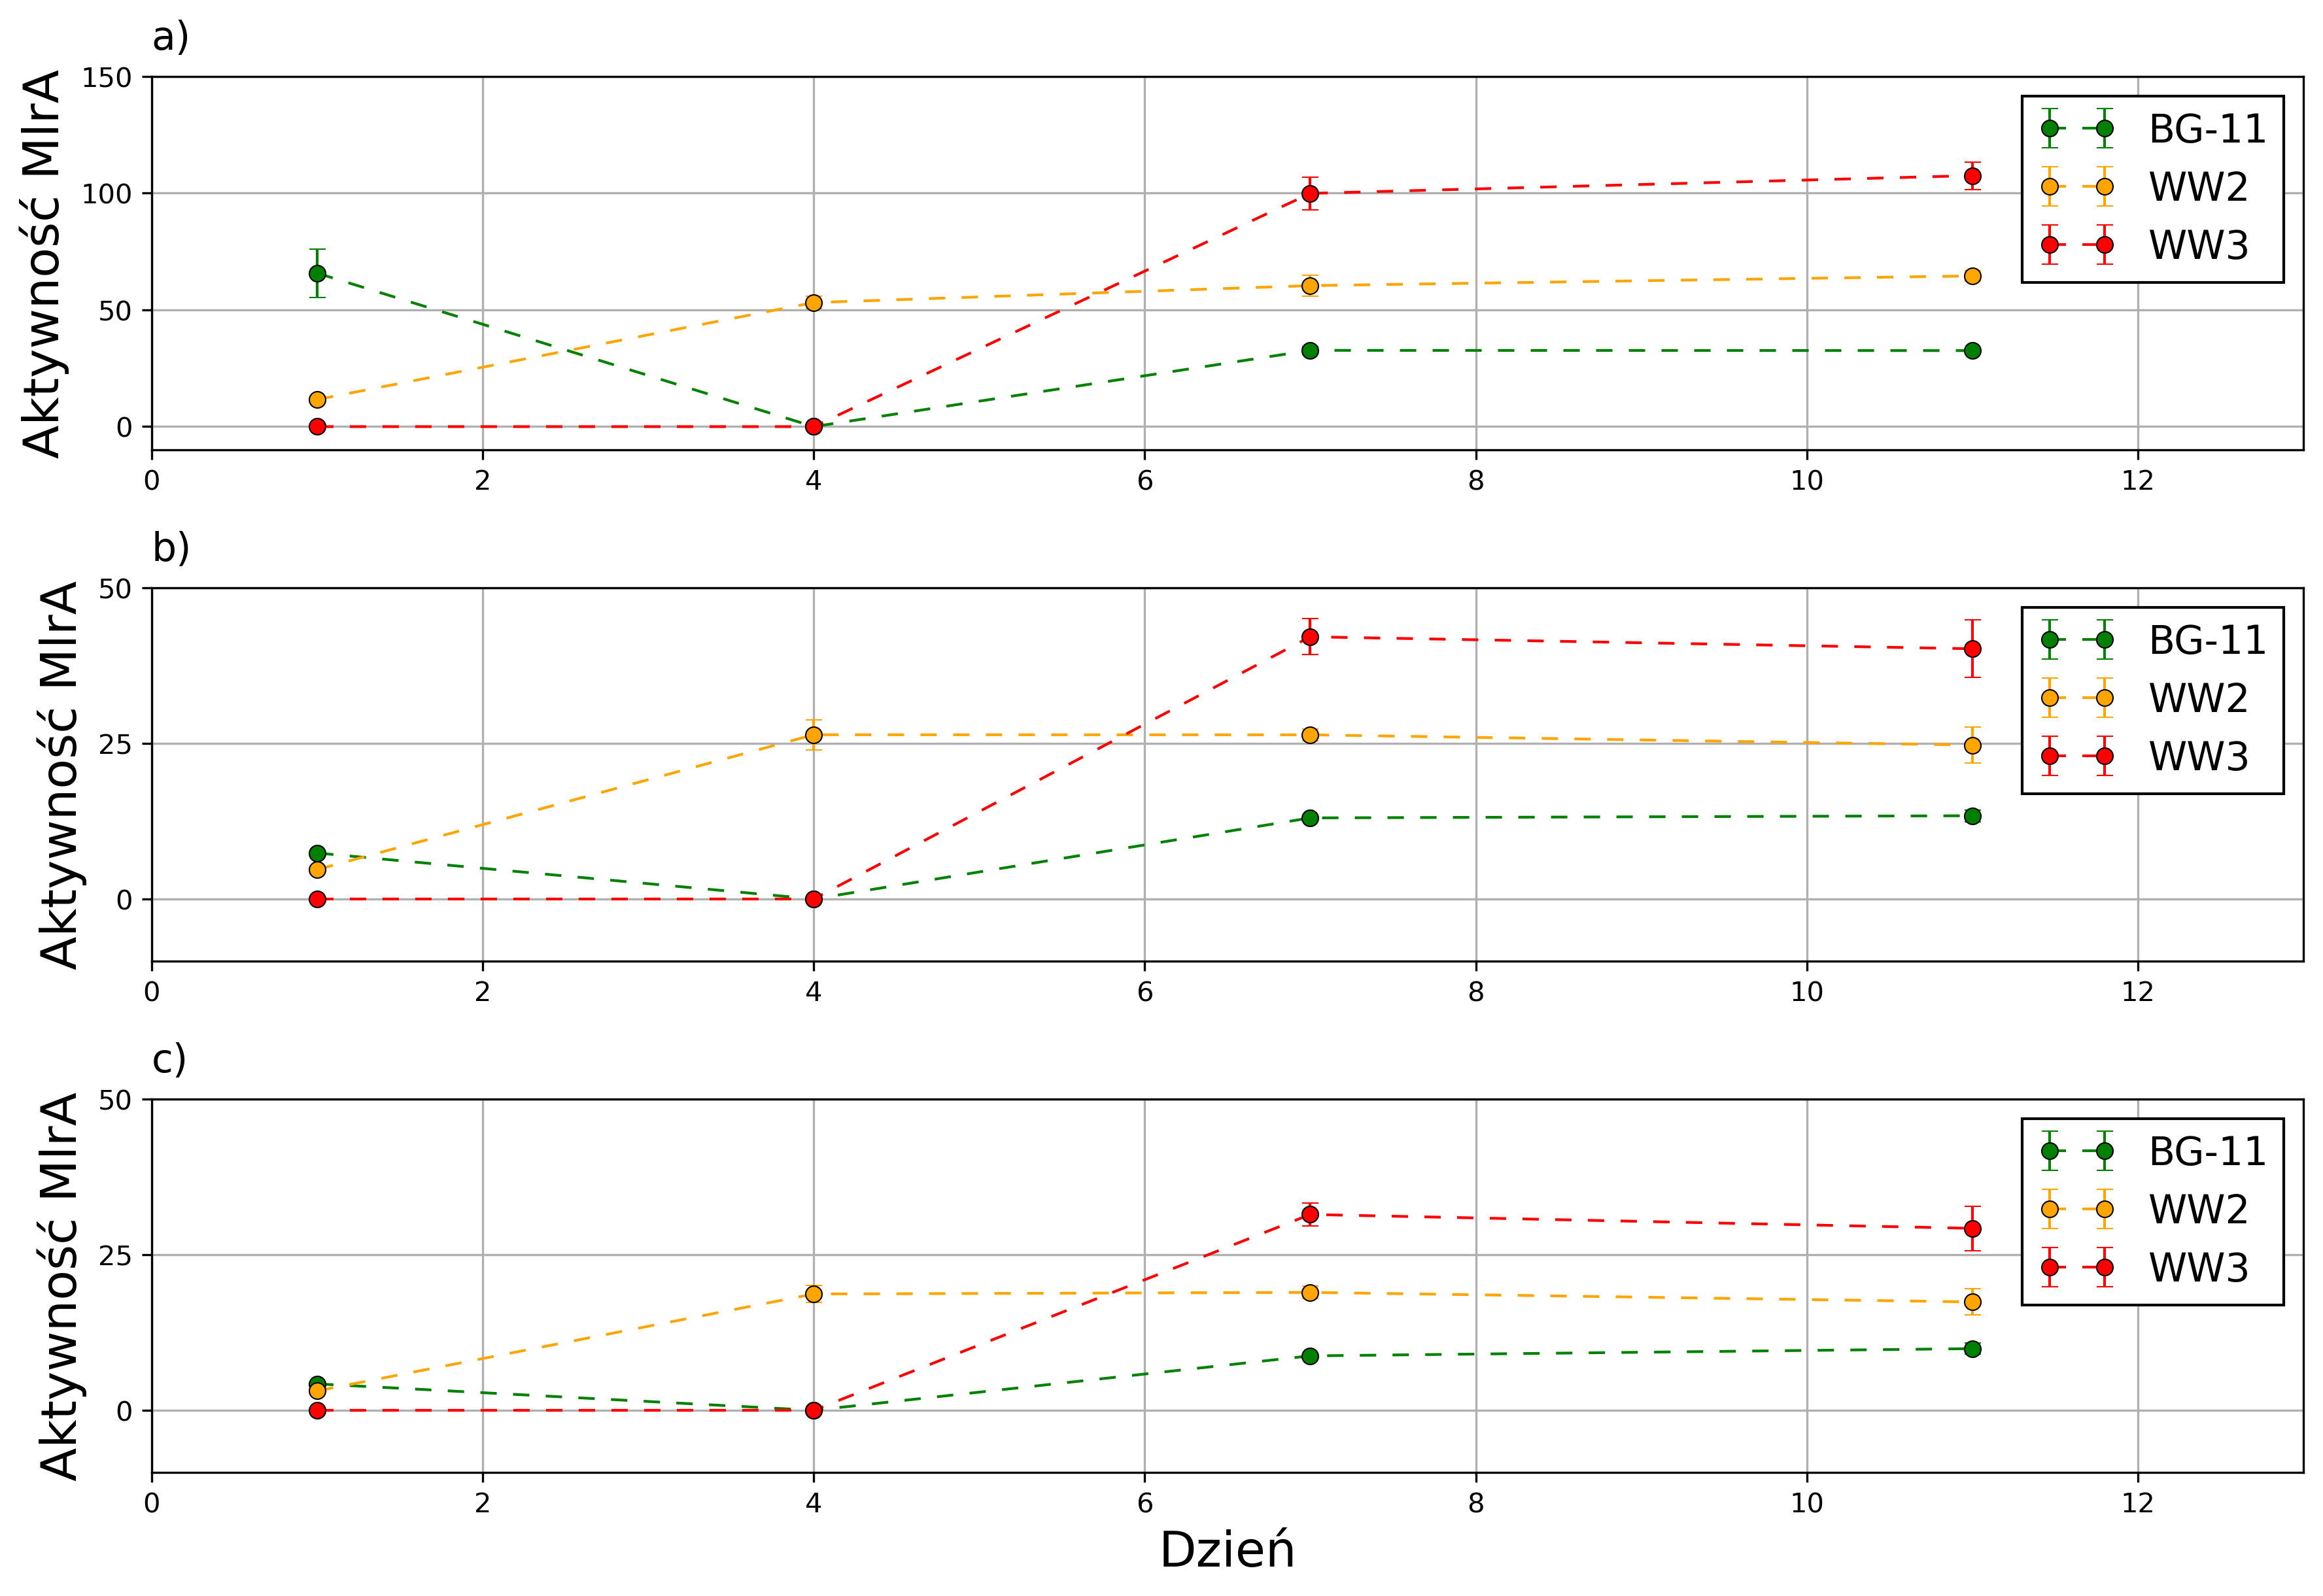

In [5]:
fig, (ax1, ax2, ax3) = plt.subplots(3, dpi=300, figsize=(12, 8))
plt.style.use('classic')
formatted_errorbar(df=df, ax=ax1, title='a)', dilution=20)
formatted_errorbar(df=df, ax=ax2, title='b)', dilution=50)
formatted_errorbar(df=df, ax=ax3, title='c)', dilution=100)
fig.tight_layout()
ax3.set_xlabel('Dzień', fontdict={'fontsize': 18})
ax2.set_ylim([-10, 50])
ax3.set_ylim([-10, 50])
ax2.set_yticks([0, 25, 50])
ax3.set_yticks([0, 25, 50])
plt.savefig('../manuscript/figures/mlra_activity.png', bbox_inches='tight')
plt.show()
plt.close(fig)